# 一、数据清洗

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_csv('taobao.csv')
df.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time
0,98047837,232431562,1,NaN,4245,2014-12-06 02
1,97726136,383583590,1,NaN,5894,2014-12-09 20
2,98607707,64749712,1,NaN,2883,2014-12-18 11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10
4,98145908,290208520,1,NaN,13926,2014-12-16 21


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12256906 entries, 0 to 12256905
Data columns (total 6 columns):
user_id          int64
item_id          int64
behavior_type    int64
user_geohash     object
item_category    int64
time             object
dtypes: int64(4), object(2)
memory usage: 561.1+ MB


In [5]:
# 缺失数据查看
df.isnull().sum()

user_id                0
item_id                0
behavior_type          0
user_geohash     8334824
item_category          0
time                   0
dtype: int64

In [6]:
df.describe()

,user_id,item_id,behavior_type,item_category
count,1.225691e+07,1.225691e+07,1.225691e+07,1.225691e+07
mean,7.170732e+07,2.023084e+08,1.105271e+00,6.846162e+03
std,4.122920e+07,1.167397e+08,4.572662e-01,3.809922e+03
min,4.913000e+03,6.400000e+01,1.000000e+00,2.000000e+00
25%,3.584965e+07,1.014130e+08,1.000000e+00,3.721000e+03
50%,7.292804e+07,2.021359e+08,1.000000e+00,6.209000e+03
75%,1.073774e+08,3.035405e+08,1.000000e+00,1.029000e+04
max,1.424559e+08,4.045625e+08,4.000000e+00,1.408000e+04


通过head 将time分为日期和小时  
通过缺失值 删除user_geohash  

In [7]:
df['time'] = pd.to_datetime(df['time'])
df['date'] = df['time'].map(lambda x: x.date())
df['hour'] = df['time'].map(lambda x: x.hour)
df.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
0,98047837,232431562,1,NaN,4245,2014-12-06 02:00:00,2014-12-06,2
1,97726136,383583590,1,NaN,5894,2014-12-09 20:00:00,2014-12-09,20
2,98607707,64749712,1,NaN,2883,2014-12-18 11:00:00,2014-12-18,11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10:00:00,2014-12-06,10
4,98145908,290208520,1,NaN,13926,2014-12-16 21:00:00,2014-12-16,21


In [8]:
del df['time']
del df['user_geohash']

查找出所有买过商品的用户  
数据中只保留买过商品用户的信息  
behavior_type	1浏览商品  2收藏商品  3加入购物车  4购买

In [9]:
user_buy = df[df['behavior_type']==4]['user_id'].unique()
df = df[df['user_id'].isin(user_buy)]
df.shape

(11759030, 6)

查询数据中信息最近的日期

In [10]:
df.sort_values('date',ascending=False).head()

,user_id,item_id,behavior_type,item_category,date,hour
997688,123063109,220421653,1,1029,2014-12-18,17
6558695,18728199,297161273,1,1224,2014-12-18,9
7915895,47237907,280562654,1,10265,2014-12-18,12
6558711,18728199,297161273,2,1224,2014-12-18,9
1402755,47874120,59923038,1,13230,2014-12-18,11


# 二、数据分析

## 2.1 分析用户购买的频率

In [11]:
from datetime import datetime

In [12]:
datetime.strptime('2014-12-11', '%Y-%m-%d')  # p  parse   strptime  字符串转时间

datetime.datetime(2014, 12, 11, 0, 0)

In [13]:
# 统计近7天（2014.12.11-2014.12.18）购买数量
# 统计近7天的所有数据
df_7 = df[df['date']>=datetime.strptime('2014-12-11', '%Y-%m-%d').date()]
# 分析每个用户的购买商品的数量
df_7_buy = df_7[df_7['behavior_type']==4].groupby('user_id').count()['hour'].reset_index().rename(columns={'hour': '7'})
df_7_buy.head()

,user_id,7
0,4913,3
1,6118,1
2,7528,1
3,7591,9
4,12645,2


In [14]:
# 统计近15天（2014.12.03之前）的购买数量
df_15 = df[df['date'] < datetime.strptime('2014-12-03', '%Y-%m-%d').date()]
df_15_buy = df_15[df_15['behavior_type']==4].groupby('user_id').count()['hour'].reset_index().rename(columns={'hour': '15'})
df_15_buy.head()

,user_id,15
0,4913,1
1,7528,4
2,7591,2
3,12645,5
4,54056,1


In [15]:
# 统计近30天（2014.11.18-2014.12.18）购买数量
df_30 = df[df['date'] >=datetime.strptime('2014-11-18', '%Y-%m-%d').date()]
df_30_buy = df_30[df_30['behavior_type']==4].groupby('user_id').count()['hour'].reset_index().rename(columns={'hour': '30'})
df_30_buy.head()

,user_id,30
0,4913,6
1,6118,1
2,7528,6
3,7591,21
4,12645,8


In [16]:
# 购买频率 = 近7天数量*1 + 近15天数量*0.7 + 近30天数量*0.4
# 合并上面计算的三个df数据
df_user = pd.merge(df_7_buy, df_15_buy, on='user_id')
df_user = pd.merge(df_user, df_30_buy, on='user_id')
df_user['购买频率'] = df_user['7'] + df_user['15'] * 0.7 + df_user['30'] * 0.4
del df_user['7']
del df_user['15']
del df_user['30']
df_user.head()

,user_id,购买频率
0,4913,6.1
1,7528,6.2
2,7591,18.8
3,12645,8.7
4,79824,15.3


## 2.2 用户活跃度

In [17]:
# 统计每个用户商品浏览量
df_view = df[df['behavior_type']==1].groupby('user_id').count()['hour'].reset_index().rename(columns={'hour': '浏览量'})
# 、收藏量
df_save = df[df['behavior_type']==2].groupby('user_id').count()['hour'].reset_index().rename(columns={'hour': '收藏量'})
# 、加购物车量
df_cart = df[df['behavior_type']==3].groupby('user_id').count()['hour'].reset_index().rename(columns={'hour': '购物车'})
# 、购买量
df_buy = df[df['behavior_type']==4].groupby('user_id').count()['hour'].reset_index().rename(columns={'hour': '购买量'})

In [18]:
# 活跃度= 购买量 + 加购物车 *0.8  + 收藏  * 0.5 + 浏览量  * 0.2
df_user = pd.merge(df_user, df_view, on='user_id')
df_user = pd.merge(df_user, df_save, on='user_id')
df_user = pd.merge(df_user, df_cart, on='user_id')
df_user = pd.merge(df_user, df_buy, on='user_id')
df_user['活跃度'] = df_user['购买量'] + df_user['购物车'] * 0.8 + df_user['收藏量'] * 0.5 + df_user['浏览量'] * 0.2
del df_user['购买量']
del df_user['购物车']
del df_user['收藏量']
del df_user['浏览量']
df_user.head()

,user_id,购买频率,活跃度
0,4913,6.1,385.3
1,7528,6.2,62.3
2,12645,8.7,66.6
3,88930,26.4,361.4
4,100539,15.1,267.1


## 2.3 用户的复购情况

In [19]:
# 查找出每个用户最大的复购次数
df_re = df.groupby(['user_id', 'item_id']).count()['hour'].reset_index()
df_re.head()

,user_id,item_id,hour
0,4913,315532,1
1,4913,876969,6
2,4913,2741340,1
3,4913,3007091,3
4,4913,4210607,1


In [20]:
# 查找每个用户最大的hour
df_re = df_re.groupby('user_id').max()['hour'].reset_index().rename(columns={'hour': '复购次数'})
df_re.head()

,user_id,复购次数
0,4913,44
1,6118,7
2,7528,12
3,7591,51
4,12645,14


In [21]:
# 将数据添加到df_user中
df_user = pd.merge(df_user, df_re, on='user_id')
df_user.head()

,user_id,购买频率,活跃度,复购次数
0,4913,6.1,385.3,44
1,7528,6.2,62.3,12
2,12645,8.7,66.6,14
3,88930,26.4,361.4,35
4,100539,15.1,267.1,16


## 2.4用户的活跃时间

In [22]:
# 最晚活跃时间
df_act = df.groupby('user_id')['hour'].max().reset_index().rename(columns={'hour':'活跃时间'})
df_user = pd.merge(df_user, df_act, on='user_id')
df_user.head()

,user_id,购买频率,活跃度,复购次数,活跃时间
0,4913,6.1,385.3,44,23
1,7528,6.2,62.3,12,22
2,12645,8.7,66.6,14,23
3,88930,26.4,361.4,35,23
4,100539,15.1,267.1,16,23


## 2.5用户购买物品种类数量

In [23]:
# 按照用户，物品种类分组
df1 = df.groupby(['user_id', 'item_id']).count()['hour'].reset_index()
df_kind = df1.groupby('user_id')['item_id'].count().reset_index().rename(columns={'item_id': '种类数量'})
df_kind.head()

,user_id,种类数量
0,4913,664
1,6118,52
2,7528,73
3,7591,185
4,12645,82


In [24]:
df_user = pd.merge(df_user, df_kind, on='user_id')
df_user.head()

,user_id,购买频率,活跃度,复购次数,活跃时间,种类数量
0,4913,6.1,385.3,44,23,664
1,7528,6.2,62.3,12,22,73
2,12645,8.7,66.6,14,23,82
3,88930,26.4,361.4,35,23,453
4,100539,15.1,267.1,16,23,359


In [25]:
# 将user_id变为索引项
df_user.to_csv('pre.csv')
df = pd.read_csv('pre.csv', index_col='user_id')
del df['Unnamed: 0']
df.head()

,购买频率,活跃度,复购次数,活跃时间,种类数量
user_id,,,,,
4913,6.1,385.3,44,23,664
7528,6.2,62.3,12,22,73
12645,8.7,66.6,14,23,82
88930,26.4,361.4,35,23,453
100539,15.1,267.1,16,23,359


# 三、用户画像提取

K-means  K值选择   手肘法、轮廓系数法

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [27]:
df = MinMaxScaler().fit_transform(df)

In [28]:
# 每次sse
s_list = []
ss_list = []
for i in range(2, 8):
    # 创建Kmeans模型
    model = KMeans(i)
    model.fit(df)
    # 添加sse数据
    s_list.append(model.inertia_)
    y_ = model.predict(df)
    # 添加轮廓系数
    ss_list.append(silhouette_score(df, y_))

Text(0, 0.5, 'SSE损失')

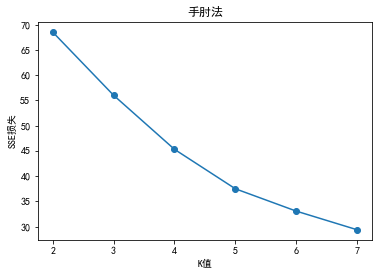

In [29]:
plt.plot(range(2, 8), s_list, marker='o')
plt.title('手肘法')
plt.xlabel('K值')
plt.ylabel('SSE损失')

Text(0, 0.5, '轮廓系数')

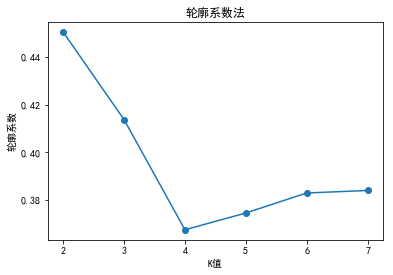

In [30]:
plt.plot(range(2,8), ss_list, marker='o')
plt.title('轮廓系数法')
plt.xlabel('K值')
plt.ylabel('轮廓系数')

雷达图：可视化分析不同聚类效果产生影响

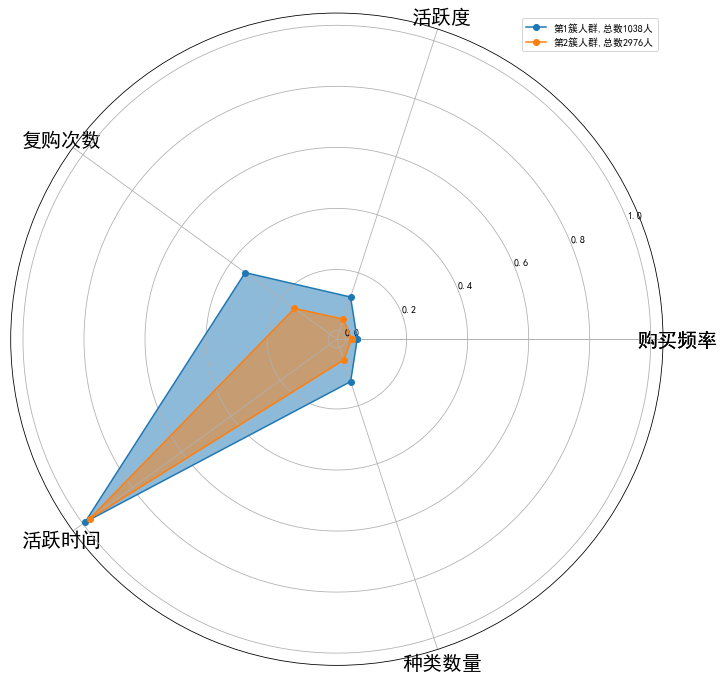

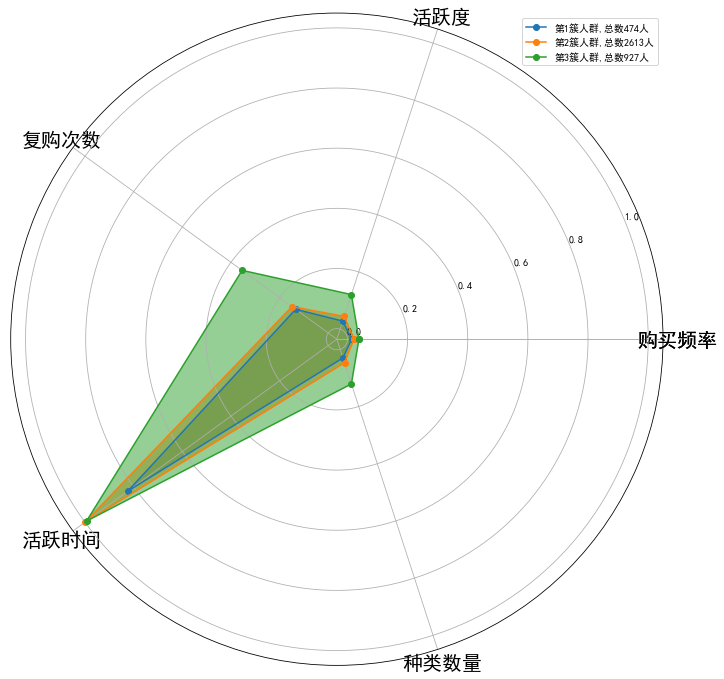

In [50]:
# 分析K=2或3进行分析
for k in range(2, 4):
    model = KMeans(k)
    model.fit(df)
    # 分析数据，1.各个类别占比   2.质心所在位置
    r1 = pd.Series(model.labels_).value_counts()
    r2 = pd.DataFrame(model.cluster_centers_)
    # 标定雷达图圆心数值 min  轮廓数值 max
    min, max = 0, 1
    r = pd.concat([r2, r1], axis=1)
    r.columns = ['购买频率', '活跃度', '复购次数', '活跃时间', '种类数量'] + ['类别数目']
    center_num = r.values
    # 绘图处理
    fig = plt.figure(figsize=(15, 12)) # 设置图像大小
    ax = fig.add_subplot(111, polar=True) # 雷达，极坐标
    feature = ['购买频率', '活跃度', '复购次数', '活跃时间', '种类数量']
    n = len(feature) # 查看特征数量
    for i, v in enumerate(center_num): # i 第几个聚类  v 对应的数值
        # 设置雷达图角度
        # 从0到2π，等分成5组
        angles = np.linspace(0, 2*np.pi, n, endpoint=False)
        # 保证雷达图围一圈
        center = np.concatenate((v[:-1], [v[0]])) # 质心中某一个特征数值
        angles = np.concatenate((angles, [angles[0]]))
        # 绘制折线图
        ax.plot(angles, center, 'o-', label='第%d簇人群,总数%d人'%(i+1, v[-1]))
        # 填充颜色
        ax.fill(angles, center, alpha=0.5)
        # 添加标签
        ax.set_thetagrids(angles * 180/np.pi, np.concatenate((feature, [feature[0]])), fontsize=20)
        plt.legend()
    plt.show()

雷达图 最优K值，每个多边形有明显差异   
K=2时候，效果最好